**Back of Workds Meets Bags of Popcorn**

https://www.kaggle.com/c/word2vec-nlp-tutorial

* [자연 언어 처리(Natural Language Processing)](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0_%EC%96%B8%EC%96%B4_%EC%B2%98%EB%A6%AC)
: 인간이 발화하는 언어 현상을 기계적으로 분석해서 컴퓨터가 이해할 수 있는 형태로 만드는 자연 언어 이해 혹은 그러한 형태를 다시 인간이 이해할 수 있는 언어로 표현하는 제반 기술을 의미 (출처 : 위키피디아)


* NLP 관련 Kaggle 대회
    - [Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)
    - [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) : 악플 선별
    - [Spooky Author Identification](https://www.kaggle.com/c/spooky-author-identification) : 할로윈 때 무시무시한 글에 대한 작성자 분류


***
***Tutorial Overview***

- Part1 : **Count2Vec** 을 사용하는 기본 자연어 처리
- Part2, 3 
    - 딥러닝 기법인 **Word2Vec**을 사용하여 모델을 학습시키는 방법과 감정분석에 단어 벡터를 사용하는 방법을 본다.
    - 파트3는 레시피를 제공하지 않고 Word2Vec을 사용하는 몇 가지 방법을 실험해 본다.
    - 파트3에서는 K-means 알고리즘을 사용해 군집화를 해본다.
    - 긍정과 부정 리뷰가 섞여있는 100,000만개의 IMDB 감정분석 데이터 세트를 통해 목표를 달성해 본다.

***
***Cf. ROC 커브 기반 평가***

- TPR(True Positive Rate)과 FPR(False Positive Rate)을 각각 x, y 축으로 놓은 그래프

- 민감도 TPR
    - 1인 케이스에 대해 1로 예측한 비율
    - 암환자를 진찰해서 암이라고 진단함
- 특이도 FPR
    - 0인 케이스에 대해 1로 잘못 예측한 비율
    - 암환자가 아닌데 암이라고 진단함
- X, Y가 둘 다 [0, 1] 범위이고 (0, 0)에서 (1, 1)을 잇는 곡선이다.

- ROC 커브의 및 면적이 1에 가까울 수록(왼쪽 꼭지점에 다가갈수록) 좋은 성능

- 참고 :
    - New Sight :: Roc curve, AUR(AUCOC), 민감도, 특이도
    - ROC의 AUC 구하기 :: 진화하자 - 어디에도 소속되지 않기
    - Receiver operating characteristic - Wikipedia

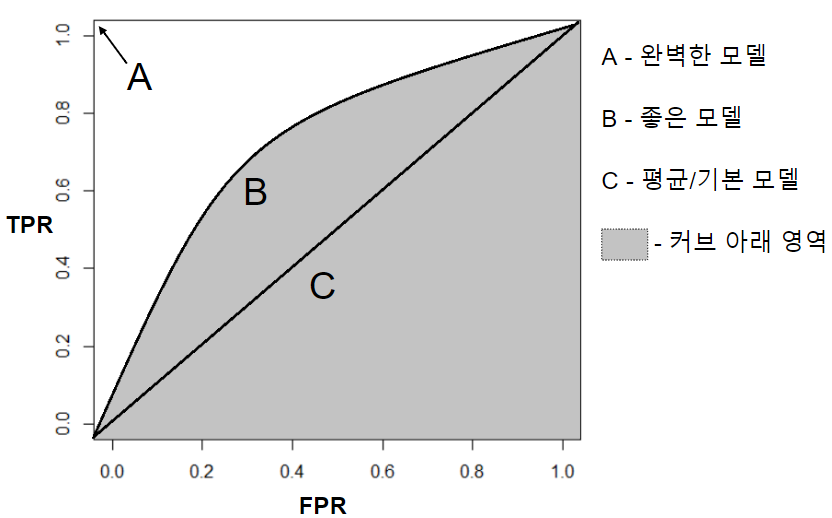

In [11]:
from IPython.display import Image
Image("../img/K_ROC.png") # code안에서 나오게 할 때

***
***Use Google's Word2Vec for movie reviews***

- 자연어 텍스트를 분석해서 특정단어를 얼마나 사용했는지, 얼마나 자주 사용했는지, 어떤 종류의 텍스트인지 분류하거나 긍정인지 부정인지에 대한 감정분석, 그리고 어떤 내용인지 요약하는 정보를 얻을 수 있다.

- 감정분석은 머신러닝(기계학습)에서 어려운 주제로 풍자, 애매모호한 말, 반어법, 언어 유희로 표현을 하는데 이는 사람과 컴퓨터에게 모두 오해의 소지가 있다. 여기에서는 Word2Vec을 통한 감정분석을 해보는 튜토리얼을 해본다.

- Google의 Word2Vec은 단어의 의미와 관계를 이해하는 데 도움
- 상당수의 NLP기능은 nltk모듈에 구현되어 있는데 이 모듈은 코퍼스, 함수와 알고리즘으로 구성되어 있다.

- 단어 임베딩 모형 테스트 : [Korean Word2Vec](https://word2vec.kr/search/)

***
***BOW(Bag Of Words)***

- 가장 간단하지만 효과적이라 널리쓰이는 방법

- 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 **각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아린다.**

- 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있다.

- BOW는 단어의 **순서가 완전히 무시** 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하다.

    - it's bad, not good at all.
    - it's good, not bad at all.
- 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.

- 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 **n-gram은 n개의 토큰을 사용할 수 있도록 한다.**

***NLTK Library***

- 파이썬을 이용한 자연어처리 툴킷
- 분류, 토큰, 형태소 분석, 태깅, 구문 분석 및 의미 추론을 위한 텍스트 처리 라이브러리


In [1]:
#conda install nltk

In [2]:
import nltk
!pip3 show nltk

Name: nltk
Version: 3.4.5
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: /Users/imsoyoung/.local/lib/python3.7/site-packages
Requires: six
Required-by: 


In [4]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""

토큰화 nltk.word_tokenize()

In [5]:
tokens = nltk.word_tokenize(sentence)
tokens 

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

태깅 nltk.pos_tag(tokens)

In [8]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True